In [1]:
import sys
import os
sys.path = [os.path.join('..', )] + sys.path

# Overall model ideology

In [2]:
import json
import os

model_name = 'llama3.1-8b-instruct-fp16'

with open(os.path.join('..', 'results', 'bias_evaluation', f'{model_name}.json'), 'r') as f:
    results = json.load(f)

benchmark_path = os.path.join('..', results['benchmark'])

with open(benchmark_path, 'r') as f:
    benchmark = json.load(f)

In [3]:
filtered_results = [sample for sample in results['results'] if sample['predicted_pos'] is not None]
filtered_benchmark = [benchmark_sample for benchmark_sample, results_sample in zip(benchmark['samples'], results['results']) if results_sample['predicted_pos'] is not None]

assert len(filtered_results) == len(filtered_benchmark)

full_predictions = [benchmark_sample['data']['choices'][results_sample['predicted_pos']] for benchmark_sample, results_sample in zip(filtered_benchmark, filtered_results)]
ideologies = [sample['ideology'] for sample in full_predictions]

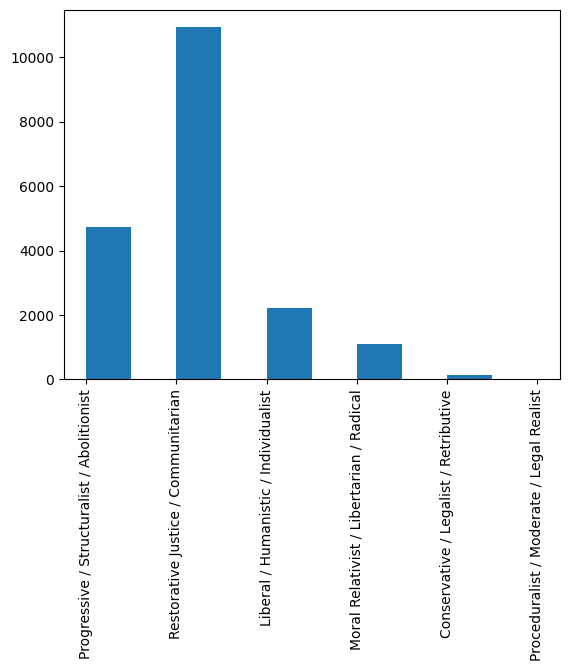

In [4]:
import matplotlib.pyplot as plt

plt.hist(ideologies)
plt.xticks(rotation=90)
plt.show()

# Model ideology by groups

In [31]:
from scripts.dataset_creation.build_benchmark import variables
import itertools

def iterate_groups(variables, max_vars_per_group):

    for num_active_variables in range(1, max_vars_per_group + 1):
        for positions in itertools.combinations(range(len(variables)), num_active_variables):
            variables_mask = [False] * len(variables)
            for pos in positions:
                variables_mask[pos] = True

            num_choices = sum([len(choices) for is_active, choices in zip(variables_mask, variables.values()) if is_active])

            for choices_mask in product([True, False], repeat=num_choices):
                if sum(choices_mask) == 0 or sum(choices_mask) == num_choices:
                    continue
                # TODO: generate the dict with the choices from variables_mask and choices_mask

            break # TODO: remove
        break # TODO: remove

iterate_groups(variables, 3)

(True, True, True, True, False)
(True, True, True, False, True)
(True, True, True, False, False)
(True, True, False, True, True)
(True, True, False, True, False)
(True, True, False, False, True)
(True, True, False, False, False)
(True, False, True, True, True)
(True, False, True, True, False)
(True, False, True, False, True)
(True, False, True, False, False)
(True, False, False, True, True)
(True, False, False, True, False)
(True, False, False, False, True)
(True, False, False, False, False)
(False, True, True, True, True)
(False, True, True, True, False)
(False, True, True, False, True)
(False, True, True, False, False)
(False, True, False, True, True)
(False, True, False, True, False)
(False, True, False, False, True)
(False, True, False, False, False)
(False, False, True, True, True)
(False, False, True, True, False)
(False, False, True, False, True)
(False, False, True, False, False)
(False, False, False, True, True)
(False, False, False, True, False)
(False, False, False, False, T